# Deterministic Models and Optimization: Clustering methods, K-Means

**Note**: hand-made kmeans algorithm using synthetic data

In [1]:
import numpy as np
import math
from numpy import random
import pandas as pd
from sklearn.neighbors import DistanceMetric
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set_palette("deep")


/Users/polinab/.virtualenvs/base/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
#Simulate the data

X1 = np.random.uniform(low= 0, high=25, size=(200))
X2 = np.random.uniform(low=5, high = 30, size=(200))
df = pd.DataFrame({'i': X1, 'j':X2})

In [3]:
df

,i,j
0,20.569980,26.340798
1,15.184158,21.532898
2,22.585840,11.319493
3,10.525029,27.111231
4,19.621388,12.378000
...,...,...
195,7.098355,24.558267
196,11.922713,17.635187
197,12.715706,23.279810
198,0.192979,14.781698


<AxesSubplot:xlabel='i', ylabel='j'>

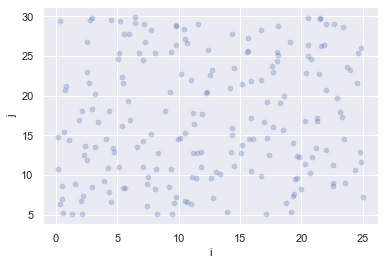

In [4]:
# fig, ax =plt.subplots(1,2, sharey=True)
sns.scatterplot(data=df,x='i', y='j', alpha=0.3)


2 groups i and j. you want 2 clusters
you want to assign each point to a cluster
algorithm will make 2 groups
plot data
based on 2 data points, calculate euclidean distance and assign the closest point to the cluster

mahalanobis for 3 ds 


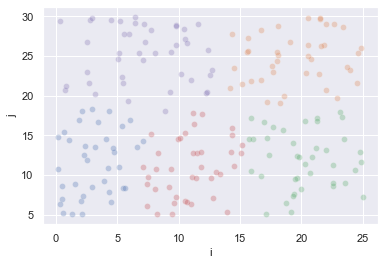

In [5]:
#using package to compare

from sklearn.cluster import KMeans

n = 5

kmeans = KMeans(n_clusters=5, random_state=0).fit(df)
df['sk_label'] = kmeans.labels_

for i in range(n):
    sns.scatterplot(data=df[df.sk_label == i],x='i', y='j', alpha=0.3)


In [6]:
def get_centroids(d,n):
    centroids = []
    for _ in range(n):
        c = np.array((d.sample().values[0][0], d.sample().values[0][1]))
        centroids.append(c)
    return centroids
        

In [7]:
def dist(x,y): 
    return np.linalg.norm(x - y) 


In [8]:
def assign_clusters(d, n, c):
    centroids = c
    assignments = []
    for x in d[['i','j']].to_numpy():
        distances = [dist(x,y) for y in centroids]
        assignments.append(distances.index(min(distances)))
    d['assignments'] = pd.Series(assignments)
    return d

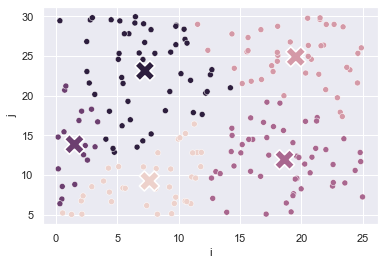

In [9]:
# implementation of 1 run with 5 clusters:
c = get_centroids(df,5)
assigned_df = assign_clusters(df,5,c)
means = assigned_df.groupby('assignments').mean()

g = sns.scatterplot(data=assigned_df,x='i',y='j',hue='assignments')
g = sns.scatterplot(data=means,x='i',y='j',hue='assignments',marker='X',s=400)
g.legend_.remove()


In [10]:
def means_to_np(m,n): 
    centroids = []
    for i in range(n):
        c = np.array((m.i.values[i], m.j.values[i]))
        centroids.append(c)
    return centroids


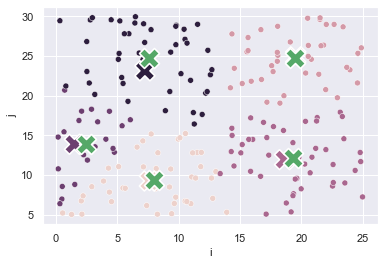

In [11]:
# reassigning means 1 time , showing locations of old and new means
reassigned_df = assign_clusters(df,5,means_to_np(means,5))
means2 = assigned_df.groupby('assignments').mean()

g = sns.scatterplot(data=assigned_df,x='i',y='j',hue='assignments')
g = sns.scatterplot(data=means,x='i',y='j',hue='assignments',marker='X',s=400)
g = sns.scatterplot(data=means2,x='i',y='j',marker='X',s=400)
g.legend_.remove()


In [12]:
# now repeat this process n times until the means do not move
# comparing old and new means until difference is 0

means = assigned_df.groupby('assignments').mean()

diff = False
while diff:
    reassigned_df = assign_clusters(d,n,means_to_np(means,n))
    newmeans = reassigned_df.groupby('assignments').mean()
    diff = means.equals(newmeans)
    means=newmeans
    
means


,i,j,sk_label
assignments,,,
0,7.997679,9.318179,2.000000
1,19.517198,24.759637,1.000000
2,19.337355,12.193713,2.148936
3,2.429715,13.927607,0.173913
4,7.581507,24.807676,3.933333


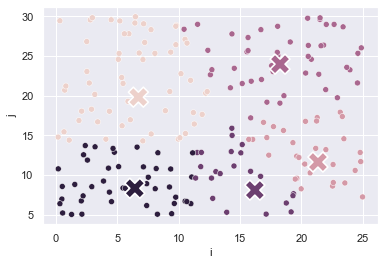

In [13]:
# modularizing it into reusable function, and final cluster visualization:
# todo: can also visualize the convergence trail

def mykmeans(d,n):
    c = get_centroids(d,n)
    assigned_df = assign_clusters(d,n,c)
    means = assigned_df.groupby('assignments').mean()

    reassigned_df = assign_clusters(assigned_df,n,means_to_np(means,n))
    newmeans = reassigned_df.groupby('assignments').mean()

    diff = False
    while diff:
        reassigned_df = assign_clusters(d,n,means_to_np(means,n))
        newmeans = reassigned_df.groupby('assignments').mean()
        diff = means.equals(newmeans)
        means=newmeans

    return reassigned_df,means

data,m = mykmeans(df,5)
g = sns.scatterplot(data=data,x='i',y='j',hue='assignments')
g = sns.scatterplot(data=m,x='i',y='j',hue='assignments',marker='X',s=400)
g.legend_.remove()


In [14]:
# with non-synthetic data

synthetic = pd.read_csv('synthetic.txt', sep="    ", header=None)
synthetic.columns = ["i", "j"]

thyroid = pd.read_csv('thyroid.txt', sep="   ", header=None)
thyroid.columns = ['a', 'b','c','d','e']


<ipython-input-14-86beb4e5015e>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  synthetic = pd.read_csv('synthetic.txt', sep="    ", header=None)
<ipython-input-14-86beb4e5015e>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  thyroid = pd.read_csv('thyroid.txt', sep="   ", header=None)


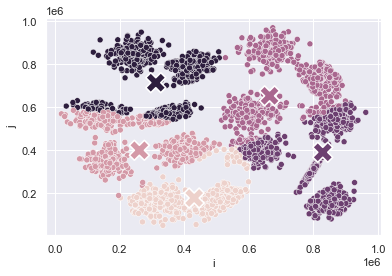

In [15]:
# using synthetic data set. my code only works for 2d data as is
# since i did not access the data initially and i'm not sure how to plot 5d data

sdata,sm = mykmeans(synthetic,5)
g = sns.scatterplot(data=sdata,x='i',y='j',hue='assignments')
g = sns.scatterplot(data=sm,x='i',y='j',hue='assignments',marker='X',s=400)
g.legend_.remove()


In [16]:
# re-doing functions for 5 columns 
# (did not have access to this data at first so did not realize I need to adapt to more than 2d)

# def get_centroids(d,n):
#     centroids = []
#     for _ in range(n):
#         c = np.array((d.sample().values[0][0], 
#                       d.sample().values[0][1],
#                       d.sample().values[0][2],
#                       d.sample().values[0][3],
#                       d.sample().values[0][4],
#                      ))
#         centroids.append(c)
#     return centroids

# def assign_clusters(d, n, c):
#     centroids = c
#     assignments = []
#     for x in d[['a', 'b','c','d','e']].to_numpy():
#         distances = [dist(x,y) for y in centroids]
#         assignments.append(distances.index(min(distances)))
#     d['assignments'] = pd.Series(assignments)
#     return d

# def mykmeans(d,n):
#     c = get_centroids(d,n)
#     assigned_df = assign_clusters(d,n,c)
#     means = assigned_df.groupby('assignments').mean()

#     reassigned_df = assign_clusters(d,n,means_to_np(means,n))
#     newmeans = reassigned_df.groupby('assignments').mean()

#     diff = False
#     while diff:
#         reassigned_df = assign_clusters(d,n,means_to_np(means,n))
#         newmeans = reassigned_df.groupby('assignments').mean()
#         diff = means.equals(newmeans)
#         means=newmeans

#     return reassigned_df,means

# get_centroids(thyroid,2)
# tdata,tm = mykmeans(thyroid,2)

# print(tm)
